## Introduction

We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.

Our job is to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

**Data description:**
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

<h2>Tables Of Contents <a class="anchor" id="table_of_contents"></a></h2>


- [1. Study the general information](#general_info)
- [2. Prepare the data](#prepare)
- [3. Analyze the data](#analyze)
- [4. Create a user profile to each region](#user_profile)
- [5. Testing the hypotheses](#hypotheses)
- [6. General conclusion](#conclusion)

## Open the data file and study the general information

<a class="anchor" id="general_info"></a>
[Go back to the Table of Contents](#table_of_contents)

Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from scipy import stats as st
import sidetable
import sys
import warnings

Load the data file into a variable called data.

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
# ignore 'FutureWarning'
if not sys.warnoptions:
       warnings.simplefilter("ignore")

First look at the data, print the first 10 rows.

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Already we can notice a few problems in the data:
- All columns names contain capital letters, this is a bad practice.
- 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating' columns have missing data.
- 'Year_of_Release' values are float data types, should be integer data type.
- 'User_Score' values are object(string) data type, should be float data type.

There might be more problems we didn't encounter yet, we'll do further investigation of the data to find more errors.

Using describe() method to get basic statistical information about the data.

In [6]:
#stats about numerical data
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
#stats about categorical data
data.describe(include = 'object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Conclusion

To conclude, there are a few issues in the data that need to be addressed:

1. Columns names contain capital letters, this is a bad practice and it'll be changed at the next stage.
2. The following columns have missing values:
- 'Name'
- 'Year_of_Release'
- 'Genre'
- 'Critic_Score'
- 'User_Score'
- 'Rating'
3. The follwing columns have the wrong data types:
- 'Year_of_Release' - float data type instead of integer, a year is a whole number.
- 'User_Score' - object data type instead of float, probably an error during the input of the data.

## Prepare the data

<a class="anchor" id="prepare"></a>
[Go back to the Table of Contents](#table_of_contents)

Replace columns names, make them lowercase.

In [8]:
data.columns = data.columns.str.lower()

Let's further investigate the data using sidetable methods to discover possible errors in the data.

Calculate the number of missing values in each column and their share of the column's number of values.

In [9]:
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


Now we have a clearer picture of the missing values in the data and their significance level.

The missing values in 'year_of_release'/'name'/'genre' columns can be dropped without affecting our analysis significantly, this can't be said about the missing values in the other columns since the shares of those missing values are near or equal 50% of the data in the columns.

Convert data to the required type.

**'user_score' column:**

Before we convert the 'user_score' column, let's use freq() method from the sidetable library to discover possible error in the column.

In [10]:
data.stb.freq(['user_score'], style=True, cum_cols=False)

,user_score,count,percent
0,tbd,"2,424",24.21%
1,7.8,324,3.24%
2,8,290,2.90%
3,8.2,282,2.82%
4,8.3,254,2.54%
5,8.5,253,2.53%
6,7.5,251,2.51%
7,7.9,249,2.49%
8,8.1,244,2.44%
9,7.7,240,2.40%


We noticed something strange, 'tbd' value which stand for 'to be determined' has 2,424 instances in the column which account for 24.21% of the total data in 'user_score'.

Well, that is a big proportion of the data in 'user_score' so we can't drop the rows with 'tbd' values.
We also can't replace it with numeric value because that would impact the data significantly.

In this case, the logical way of handling this is with to_numeric method with errors='coerce' argument.
It might add more missing values to the data but at least this way we can convert the column to the correct data type with the least impact on our analysis.

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

**'year_of_release' column:**

Before we can change the data type of 'year_of_release' values to integers, the missing values need to be filled/dropped.

Since there is no logical way to fill the missing values in the column we'll simply drop the rows with those values.
The missing values account for less than 2% of the total values in the column so it won't impact our analysis significantly.

In [12]:
data.dropna(subset=['year_of_release'], inplace=True)

Now we can change 'year_of_release' values data types without worry. 

In [13]:
#Convert 'year_of_release' to int
data['year_of_release'] = data['year_of_release'].astype('int')

Earlier we noticed missing values in the columns: 'name', 'genre'. In each column there are 2 missing values, let's check if they are in the same rows.

In [14]:
#locate the rows with missing values in 'name' column
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Above we can see that the missing values in 'name' and 'genre' are in matching rows, since these rows account for less than 1% of the data and since we have no logical way of filling those values, we'll drop them.

In [15]:
data.dropna(subset=['name'], inplace=True)

Regarding the rest of the columns with missing values, since those column's values represents scores/ratings we have no logical way of filling those values without impact our analysis significantly. Moreover, since the values of these columns are critical to our analysis later it would be wrong to fill the missing values in the columns.

Now, claculate the total sales for each game and assign the values to 'total_sales' column:

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Conclusion

To conclude, first thing we did was change the columns names to be lowercase letters.

Next, using the stb.missing() method we calculated the number of missing values in each column and their share of total values in the columns. With that information we determined that the missing values in 'year_of_release'/'name'/'genre' can be dropped without significantly impact our analysis (missing values share was less than 2% in each of these columns).

On the other hand, the missing values share in each of the columns 'critic_score'/'rating' was more than 40%, since there is no logical way of filling those missing values without affecting our analysis significantly, we decided to leave them blank.

In the case of 'user_score' column, we used the stb.freq() method and discovered that the value 'tbd' accounts for more than 24% of the data in the column, this was definitely something that needed to be addressed. 
This issue was handled with the to_numeric method ('tbd' was changed to NaN), the missing values in the column were left blank (same reasoning as in the 'critic_score'/'rating' columns).

Possible explanations for the missing data is that something went wrong during the input/preprocess of the data. For the scoring columns it might be that certain games didn't have enough exposure so they didn't get critics/users attention and wasn't scored at all. ESRB was founded in 1994, it might be that certain games that was released before that year didn't get rating and therefore the missing values in 'Rating'.

Earlier we identified the columns with the wrong data type and explained the reasoning for changing those columns data types. 
- 'year_of_release' data type was changed from float to int.
- 'user_score' data type was changed from object to float.

Lastly, we created the 'total_sales' column which sums up the sales from all regions.

## Analyze the data

<a class="anchor" id="analyze"></a>
[Go back to the Table of Contents](#table_of_contents)

At this stage we're going to answer some questions that will helps us get a better understanding of the data's patterns, trends and etc.

**Let's look at how many games were released in different years. Is the data for every period significant?**

First of all, we want to look at how many games were released in different years in order to determine if every period is significant.

Plot a histogram to look at the distribution of games by year of release.

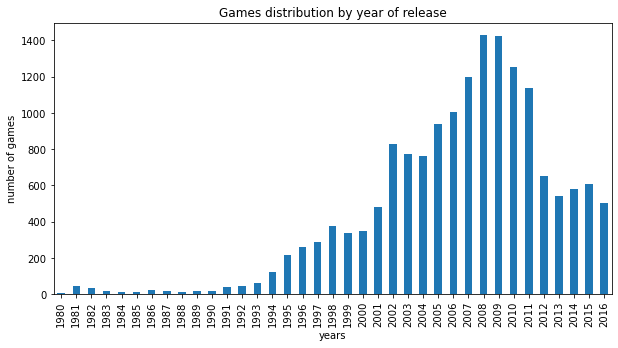

In [17]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(10,5))
#set title and x/y labels
plt.gca().set(title = 'Games distribution by year of release', xlabel='years', ylabel='number of games')
plt.show()

From the histogram above we can deduce a number of things:
1. The distribution of games by year is left skewd, meaning the median is higher than the mean.
2. The majority of games were created after 2001 and there is a peak of games created in 2008-2009.
3. Data about games created before 2002 can be considered insignificant.

**Let's look at how sales varied from platform to platform. Select the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

Next, let's look at how sales varied from platform to platform. We want to choose the platforms with the greatest total sales and build a distribution based on data for each year.

Find the most profitable platforms with bar chart.

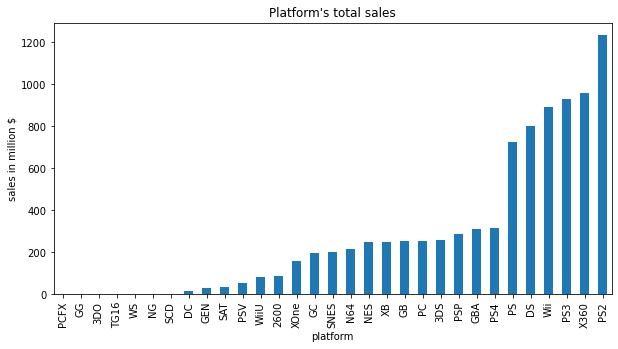

In [18]:
data.groupby('platform')['total_sales'].agg('sum').sort_values().plot(kind = 'bar', figsize=(10,5))
#set title and x/y labels
plt.gca().set(title="Platform's total sales", xlabel='platform', ylabel='sales in million $')
plt.show()

From the graph above we notice that 'PS', 'DS', 'Wii', 'PS3', 'X360', and 'PS2' are the platforms with the most amount of sales.

Create a function that plot a bar chart of platform's total sales by years.

In [19]:
def sales_by_year(data, platform_name, x_loc, y_loc):

    #plot a bar chart that represent the total sales of platform's games by year
    data.groupby('year_of_release')['total_sales'].agg('sum').plot(kind = 'bar', ax=axs[x_loc, y_loc])
    
    #assign title and x/y labels
    axs[x_loc, y_loc].set_title(platform_name, size=13)
    axs[x_loc, y_loc].set_xlabel('years')
    axs[x_loc, y_loc].set_ylabel('sales in million $')

Use the function above and create 2 rows with 3 bar charts each.

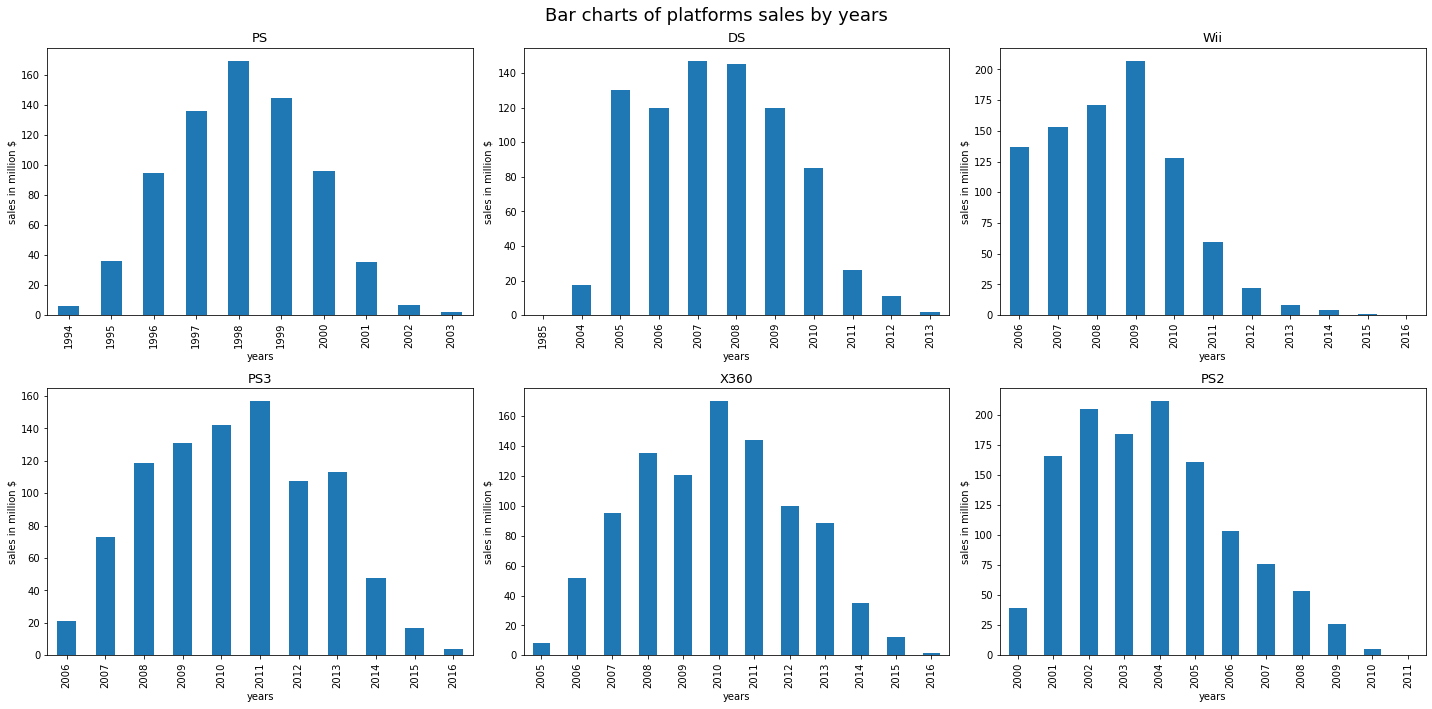

In [20]:
# set grid for bar charts and size
fig, axs = plt.subplots(2, 3, figsize=(20,10))
plt.suptitle("Bar charts of platforms sales by years", size=18)

#PS
sales_by_year(data.query('platform == "PS"'), 'PS', 0, 0)

#DS
sales_by_year(data.query('platform == "DS"'), 'DS', 0, 1)

#Wii
sales_by_year(data.query('platform == "Wii"'), 'Wii', 0, 2)

#PS3
sales_by_year(data.query('platform == "PS3"'), 'PS3', 1, 0)

#X360
sales_by_year(data.query('platform == "X360"'), 'X360', 1, 1)

#PS2
sales_by_year(data.query('platform == "PS2"'), 'PS2', 1, 2)

plt.tight_layout()
plt.show()

From the graphs above we can deduce a few things:
1. 'PS2' and 'Wii' were popular and profitable platforms at their peak but now they have zero sales(games sales). 

2. A platform lifespan length is about 10 years, meaning that usually 10 years after a platform comes out, sales goes down to 0 or almost 0.

3. In the case of Playstation brand by SONY, we can see a new 'PS' platform came out every 6 years.

**From now on we'll work only with the data that we've decided is relevant.**

Now, based on the information we got above from the graphs, we can determine that the data about games released before 2002 is irelevant to our task. So, we'll continue with our analysis with only the data from 2002 to 2016.

In [21]:
#slice the data
relevant_data = data.query('year_of_release > 2001')

**Which platforms are leading in sales? Which ones are growing or shrinking?**

Let's continue our analysis with the slice of relevant data we took from the original dataset, we want to look for the leading platforms in sales, and determine which platforms are growing or shrinking.

First, let's group the total sales of each platfrom by years.

In [22]:
annual_sales_by_plat = pd.pivot_table(relevant_data, index='year_of_release', columns='platform',
                                      values='total_sales', aggfunc = 'sum')

Plot lineplot of the platfroms total sales over time.

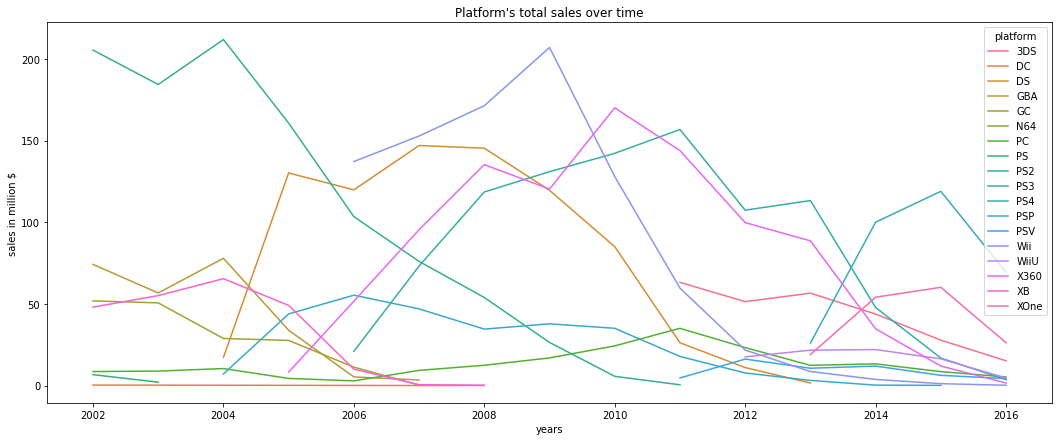

In [23]:
#set figure
fig, ax = plt.subplots(figsize=(18,7))
#lineplot
sns.lineplot(data=annual_sales_by_plat, dashes=False)
#set title and x/y labels
plt.gca().set(title="Platform's total sales over time", xlabel='years', ylabel='sales in million $')
plt.show()

There are a lot of lines in the graph so let's try to make some order.

As we saw earlier, in general, the following platforms are leading in sales 'DS', 'Wii', 'PS3', 'X360', and 'PS2'.
We can notice that 'PS2' and 'Wii' both years with peaks sales of about 200 million USD. The other 3 had peaks around the 150 mark.

We arrived to this conclusion earlier when we ploted bar charts to each of these platforms, now we can see it in one graph and see the differences each year more clearly.

What we are more interesed about this time is to determine which platforms are either growing or shrinking, for this task we'll look at the more recent part of the graph.

If we focus we can notice growth in two platforms: 'PS4' and 'XOne' (remember that data for 2016 is partial so that might explain the drop between 2015 to 2016 in both platforms).

Most of the platforms in the graph are shrinking in terms of sales, we need to keep in mind the platforms lifespan which is about 10 years, so let's focus on platforms that came out after 2010. 
That way we can assume the platforms fade in sales aren't because the platforms at their end of cycle. 

Note: 'PC' is probably an exception since it's constantly updated through the years and it can't be compared to console in that regard.

So, with that in mind we can notice that the following platforms sales are fading: 'PC', '3DS', 'WiiU', and 'PSV'.

Let's plot two more lineplots with only the platforms we mentioned above so we can see the growth/shrink more clearly.

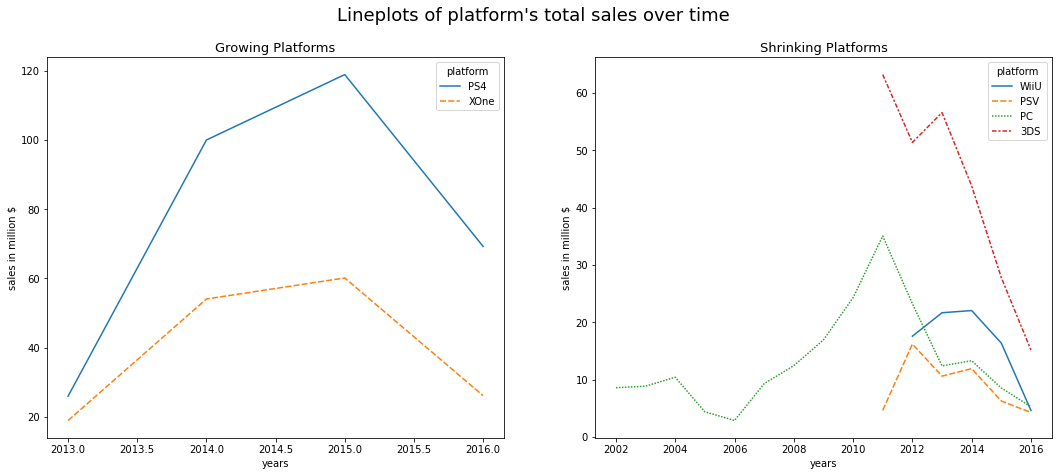

In [24]:
#set figure and axis
fig, axs = plt.subplots(1, 2, figsize=(18,7))
#title
plt.suptitle("Lineplots of platform's total sales over time", size=18)

#growing platforms
sns.lineplot(data=annual_sales_by_plat[['PS4', 'XOne']], ax=axs[0])
axs[0].set_title('Growing Platforms', size=13)
axs[0].set_xlabel('years')
axs[0].set_ylabel('sales in million $')

#shrinking platforms
sns.lineplot(data=annual_sales_by_plat[['WiiU', 'PSV', 'PC', '3DS']], ax=axs[1])
axs[1].set_title('Shrinking Platforms', size=13)
axs[1].set_xlabel('years')
axs[1].set_ylabel('sales in million $')

plt.show()

Now, we can identify 'PS4' and 'XOne' as potentially profitable platforms.

Let's create a dataframe with those 2 platforms.

In [25]:
potentially_profitable_plat = relevant_data.query('platform == "PS4" | platform == "XOne"').reset_index()

**Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms?**

Now, with the potentially_profitable_plat dataframe, we'll plot a boxplot for the global sales of all games, broken down by platform.

Let's determine if there are significant differences in sales.

Group the data by platform and game's release year, aggregate the total sales accordind to these indices and sum them up. 

In [26]:
plat_total_sales_by_year = potentially_profitable_plat.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

#sort the platforms by sales
ordered = plat_total_sales_by_year.groupby('platform')['total_sales'].sum().sort_values().reset_index()['platform']

Plot a boxplot chart.

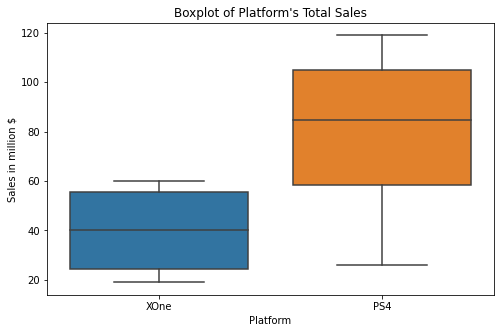

In [27]:
#set fig size
plt.figure(figsize=(8,5))

#plot boxplot
sns.boxplot(x = 'platform', y = 'total_sales', data = plat_total_sales_by_year, order = ordered)

#set title and x/y labels
plt.gca().set(title="Boxplot of Platform's Total Sales", xlabel='Platform', ylabel='Sales in million $')

plt.show()

Overall its pretty clear that there are some significant differences between the platforms in terms of total sales. 

From the graph above we can duduce a number of things:

1. Generaly, the PS4 platform is more profitable than the XOne.

2. There is not a lot of variability in the 'XOne' boxplot compare to the 'PS4', which means that XOne's total sales each year differ less from each other than the sales in PS4.

3. According to the graph, XOne's total sales are normally distributed, the mean and median values are very close.

4. According to the graph, PS4's total sales distribution is left skewd, meaning the median value is higher than the mean.

**Take a look at how user and professional reviews affect sales for one popular platform (we choose). Build a scatter plot and calculate the correlation between reviews and sales.**

Next, we'll take a look at how user and professional reviews affect sales for 'PS4' platform. We'll build a scatter plot and calculate the correlation between reviews and sales.

Plot a scatter chart to examine how critic/user scores affect sales for 'PS4' platform.

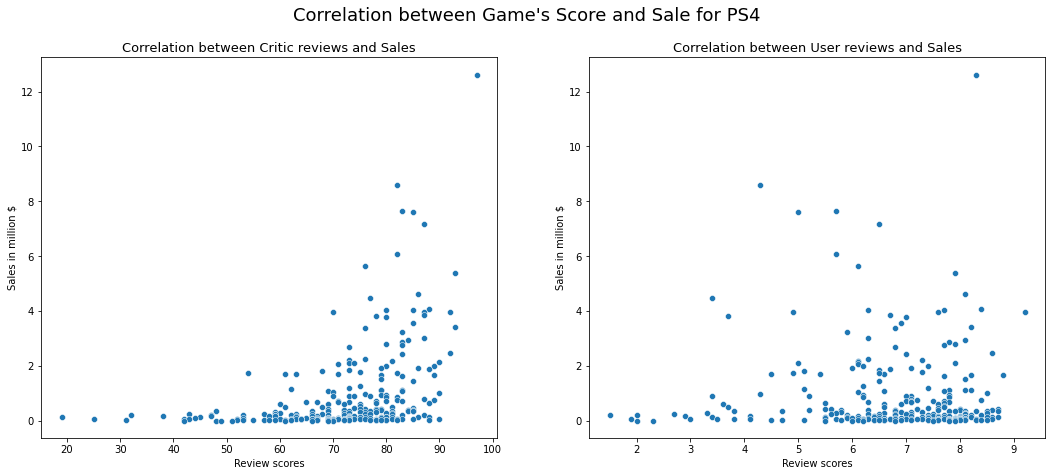

In [28]:
#set figure and axis
fig, axs = plt.subplots(1, 2, figsize=(18,7))
#title
plt.suptitle("Correlation between Game's Score and Sale for PS4", size=18)

#critic reviews
sns.scatterplot(x='critic_score', y='total_sales', data = potentially_profitable_plat.query('platform == "PS4"'), ax=axs[0])
axs[0].set_title('Correlation between Critic reviews and Sales', size=13)
axs[0].set_xlabel('Review scores')
axs[0].set_ylabel('Sales in million $')

#user reviews
sns.scatterplot(x='user_score', y='total_sales', data = potentially_profitable_plat.query('platform == "PS4"'), ax=axs[1])
axs[1].set_title('Correlation between User reviews and Sales', size=13)
axs[1].set_xlabel('Review scores')
axs[1].set_ylabel('Sales in million $')

plt.show()

Calculate the correlation between reviews and sales:

Create a correlation matrix.

In [29]:
potentially_profitable_plat[['platform', 'critic_score', 'user_score', 'total_sales']].query('platform == "PS4"').corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


From the graphs and correlation matrix we can deduce the following (apply to 'PS4' platform only):
1. There is ever so slightly negative correlation between user scores and total sales for PS4, in fact, it would not be wrong to say that there is no correlation between the variables.


2. There is some correlation between critic scores and total sales for PS4, though its not strong correlation at all.

Now, let's determine if the same conclusions apply to 'XOne' platform:

Plot a scatter chart to examine how critic/user scores affect sales for 'XOne' platform.

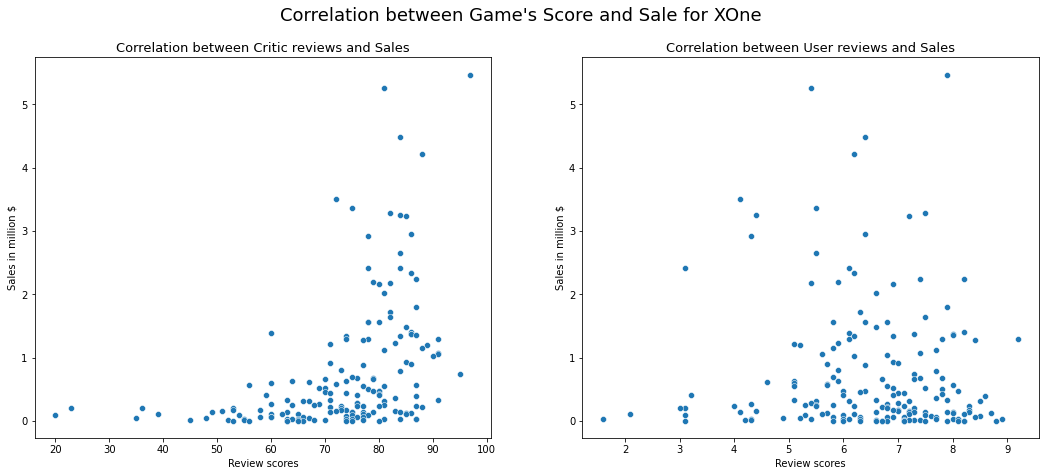

In [30]:
#set figure and axis
fig, axs = plt.subplots(1, 2, figsize=(18,7))
#title
plt.suptitle("Correlation between Game's Score and Sale for XOne", size=18)

#critic reviews
sns.scatterplot(x='critic_score', y='total_sales', data = potentially_profitable_plat.query('platform == "XOne"'), ax=axs[0])
axs[0].set_title('Correlation between Critic reviews and Sales', size=13)
axs[0].set_xlabel('Review scores')
axs[0].set_ylabel('Sales in million $')

#user reviews
sns.scatterplot(x='user_score', y='total_sales', data = potentially_profitable_plat.query('platform == "XOne"'), ax=axs[1])
axs[1].set_title('Correlation between User reviews and Sales', size=13)
axs[1].set_xlabel('Review scores')
axs[1].set_ylabel('Sales in million $')

plt.show()

Calculate the correlation between reviews and sales:

Create a correlation matrix.

In [31]:
potentially_profitable_plat[['platform', 'critic_score', 'user_score', 'total_sales']].query('platform == "XOne"').corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


From the information above we can conclude that the same conclusions for PS4 apply for XOne as well.

**Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?**

Now, let's take a look at the general distribution of games by genre.

Plot a bar chart to examine which genres are the most popular.

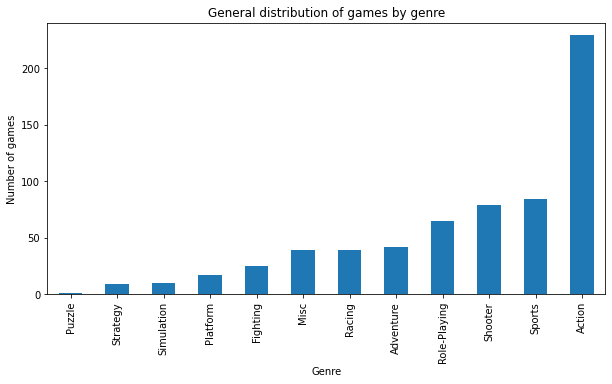

In [32]:
#create a bar chart
potentially_profitable_plat.groupby('genre')['name'].count().sort_values().plot(kind='bar', figsize=(10,5))

#set title and x/y labels
plt.gca().set(title='General distribution of games by genre', xlabel='Genre', ylabel='Number of games')
plt.show()

It seems that 'Action' is by far the most popular genre, let's further investigate and examine which platforms are the most profitable.

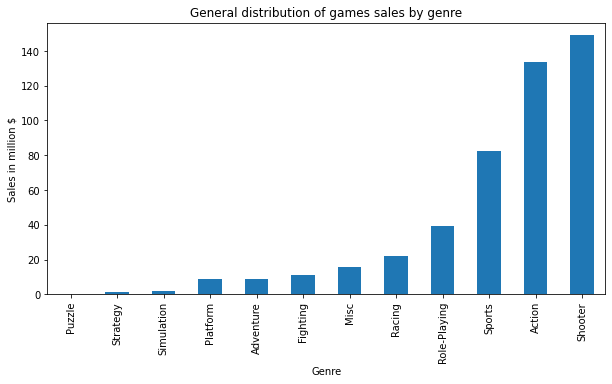

In [33]:
#create a bar chart
potentially_profitable_plat.groupby('genre')['total_sales'].sum().sort_values().plot(kind='bar', figsize=(10,5))

#set title and x/y labels
plt.gca().set(title='General distribution of games sales by genre', xlabel='Genre', ylabel='Sales in million $')
plt.show()

From the graphs above we can deduce a number of things, the top 3 genres in popularity are also the top 3 in sales, which leads us to the following conclusions:

1. The most popular genres of games tend to be the most profitable too.

2. The least popular genres of games tend to be the least profitable too.

### Conclusion

To conclude, at first we took a look at the general distribution of games by their year of release, we were able to deduce the following:

1. The distribution of games by year is left skewd, meaning the median is higher than the mean.

2. The majority of games were created after 2001 and there is a peak of games created in 2008-2009.

3. Data about games created before 2002 can be considered insignificant.

Next, we examined how sales varied from platform to platform, we found out that 'PS', 'DS', 'Wii', 'PS3', 'X360', and 'PS2' are the platforms with the most amount of sales.

Moreover with further anaylsis of the most profitable platforms we determined:

1. 'PS2' and 'Wii' were popular and profitable platforms at their peak but now they have zero sales(games sales).

2. A platform lifespan length is about 10 years, meaning that usually 10 years after a platform comes out, sales goes down to 0 or almost 0.

3. In the case of Playstation brand by SONY, we can see a new 'PS' platform came out every 6 years.

With the information above in mind we decided to slice the data and get only the relevant period of time for our analysis (2002 - 2016).

Next, we determined which platforms are leading and sales, which ones are growing or shrinking. Using lineplot to show each platform's total sales over time, we were able to extract a few points of interest:

1. The leading platform is sales are the same ones we mentioned earlier except for 'PS' which the majority of this platform data was dropped previously.

2. The growing platforms are the 'PS4' and 'XOne'.

3. The shrinking platforms are: 'PC', '3DS', 'WiiU', and 'PSV'.

After arriving to this conclusions, we decided to continue our analysis for the growing platforms only, so we created new dataframe with the suitable data.

With the new dataframe, we built a box plot for the global sales of all games, broken down by platform in order to determine if there are significant differnce in sales. We came to the following conclusions:

Generaly, the PS4 platform is more profitable than the XOne.

1. There is not a lot of variability in the 'XOne' boxplot compare to the 'PS4', which means that XOne's total sales each year differ less from each other than the sales in PS4.

2. According to the graph, XOne's total sales are normally distributed, the mean and median values are very close.

3. According to the graph, PS4's total sales distribution is left skewd, meaning the median value is higher than the mean.

Later, we took a look at how user and professional reviews affect sales for both platforms in the new dataframe. 
We built scatter plots and calculate the correlation between reviews and sales using correlation matrix. 

These are the findings (for both platforms):

1. There is ever so slightly negative correlation between user scores and total sales, in fact, we can say that there is no correlation between the variables.

2. There is some correlation between critic scores and total sales, though its not strong correlation at all.

Lastly, we took a look at the general distribution of games by genre. Using bar charts we were able to deduce the following:

1. The most popular genres of games tend to be the most profitable too.

2. The least popular genres of games tend to be the least profitable too.


## Create a user profile for each region

<a class="anchor" id="user_profile"></a>
[Go back to the Table of Contents](#table_of_contents)

**The top five platforms. Describe variations in their market shares from region to region.**

Let's take a look at the top 5 platforms in terms of sales for each region.

Plot a bar chart for each region with the most profitable platforms sorted by amount of sales.

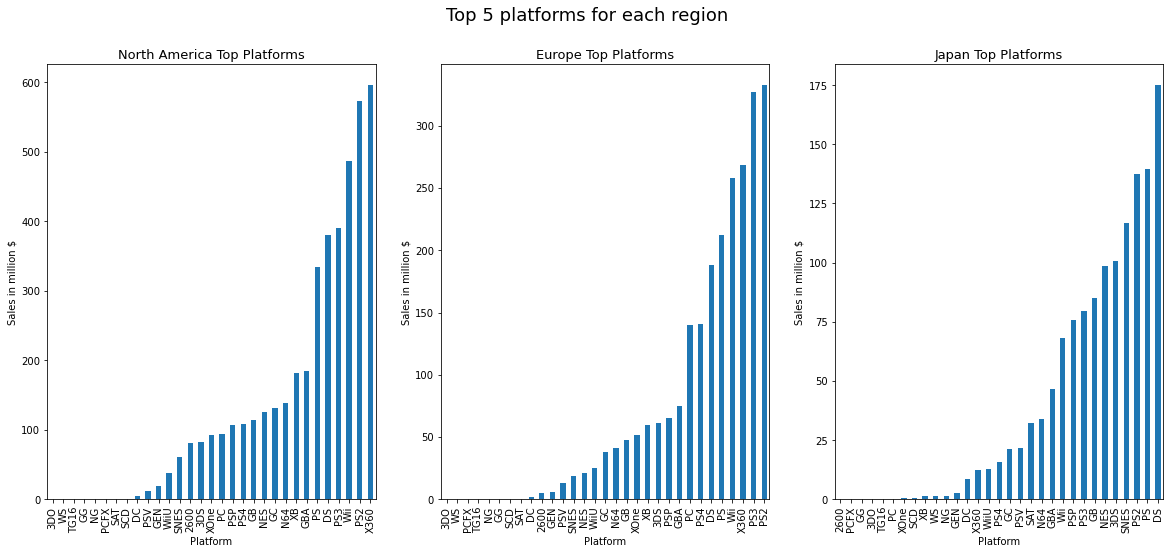

In [34]:
#set figure and axis
fig, axs = plt.subplots(1, 3, figsize=(20,8))
#title
plt.suptitle("Top 5 platforms for each region", size=18)

#na
data.groupby('platform')['na_sales'].sum().sort_values().plot(kind='bar', ax=axs[0])
axs[0].set_title('North America Top Platforms', size=13)
axs[0].set_xlabel('Platform')
axs[0].set_ylabel('Sales in million $')

#eu
data.groupby('platform')['eu_sales'].sum().sort_values().plot(kind='bar', ax=axs[1])
axs[1].set_title('Europe Top Platforms', size=13)
axs[1].set_xlabel('Platform')
axs[1].set_ylabel('Sales in million $')

#jp
data.groupby('platform')['jp_sales'].sum().sort_values().plot(kind='bar', ax=axs[2])
axs[2].set_title('Japan Top Platforms', size=13)
axs[2].set_xlabel('Platform')
axs[2].set_ylabel('Sales in million $')


plt.show()

According to the charts, we can determine the following:

- NA top 5 platforms are(from the most profitable to least):
 - X360
 - PS2
 - Wii
 - PS3
 - DS


- EU top 5 platforms are(from the most profitable to least):
 - PS2
 - PS3
 - X360
 - Wii
 - PS


- JP top 5 platforms are(from the most profitable to least):
 - DS
 - PS
 - PS2
 - SNES
 - 3DS

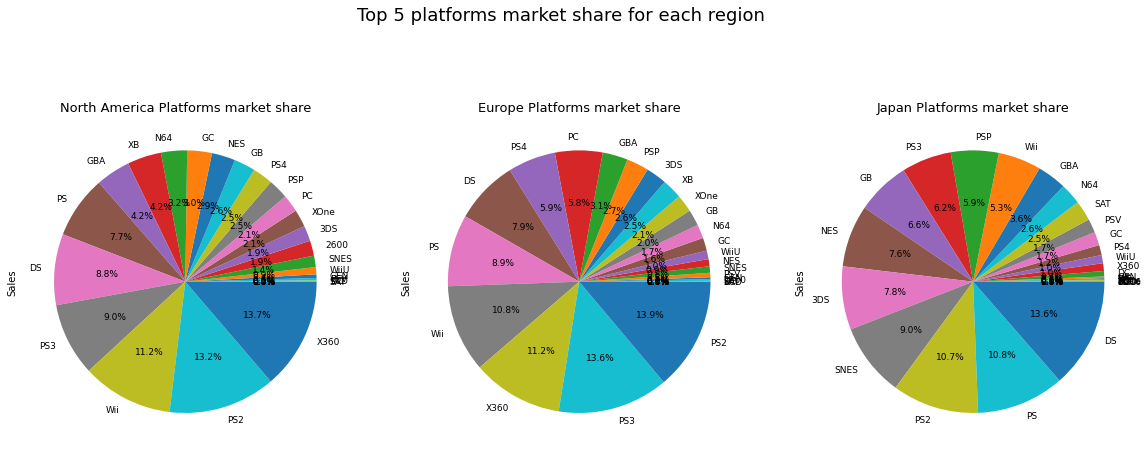

In [35]:
#set figure and axis
fig, axs = plt.subplots(1, 3, figsize=(20,8))
#title
plt.suptitle("Top 5 platforms market share for each region", size=18)

#na
data.groupby('platform')['na_sales'].sum().sort_values().plot(kind='pie', ax=axs[0], autopct='%1.1f%%', fontsize=9)
axs[0].set_title('North America Platforms market share', size=13)
axs[0].set_ylabel('Sales')

#eu
data.groupby('platform')['eu_sales'].sum().sort_values().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', fontsize=9)
axs[1].set_title('Europe Platforms market share', size=13)
axs[1].set_ylabel('Sales')

#jp
data.groupby('platform')['jp_sales'].sum().sort_values().plot(kind='pie', ax=axs[2], autopct='%1.1f%%', fontsize=9)
axs[2].set_title('Japan Platforms market share', size=13)
axs[2].set_ylabel('Sales')


plt.show()

Above we can see the market share of each platform in each region.

There are some variations in platforms market share from region to region:

- In contrast to NA(13.7% share) and  EU(11.2% share), in Japan(less than 2% share), X360 isn't one of the top 5 platforms.

- In contrast to NA(11.2% share) and  EU(10.8% share), in Japan(5.3% share), Wii isn't one of the top 5 platforms.

- In contrast to NA(9.0% share) and  EU(13.6% share), in Japan(6.2% share), PS3 isn't one of the top 5 platforms.

- In contrast to NA(8.8% share) and  JP(13.6% share), in Europe(7.9% share), DS isn't one of the top 5 platforms.

- In contrast to EU(8.9% share) and  JP(10.8% share), in North America(7.7% share), PS isn't one of the top 5 platforms.

- 3DS and SNES are top 5 platforms only in Japan.

In general, the top 5 platforms in Japan are different than the top 5 in NA/EU(which are very similar), perhaps it has something to do with the platforms companies origin(Microsoft - USA, Sony & Nintendo - Japan), maybe the culture differences affect this variations as well.

**The top five genres. Explain the difference.**

Now, let's move on to the top 5 genres for each region.

Plot a bar chart for each region with the most profitable genres sorted by amount of sales.

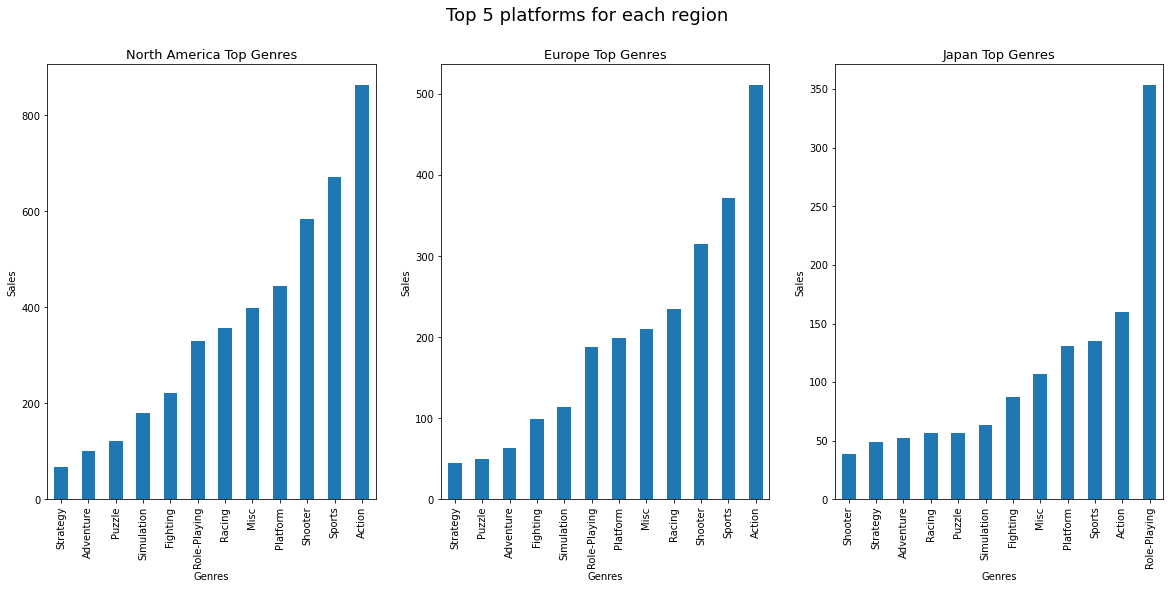

In [36]:
#set figure and axis
fig, axs = plt.subplots(1, 3, figsize=(20,8))
#title
plt.suptitle("Top 5 platforms for each region", size=18)

#na
data.groupby('genre')['na_sales'].sum().sort_values().plot(kind='bar', ax=axs[0])
axs[0].set_title('North America Top Genres', size=13)
axs[0].set_xlabel('Genres')
axs[0].set_ylabel('Sales')

#eu
data.groupby('genre')['eu_sales'].sum().sort_values().plot(kind='bar', ax=axs[1])
axs[1].set_title('Europe Top Genres', size=13)
axs[1].set_xlabel('Genres')
axs[1].set_ylabel('Sales')

#jp
data.groupby('genre')['jp_sales'].sum().sort_values().plot(kind='bar', ax=axs[2])
axs[2].set_title('Japan Top Genres', size=13)
axs[2].set_xlabel('Genres')
axs[2].set_ylabel('Sales')


plt.show()

The top game genres in each region are(in descending order):
- NA: Action, Sports, Shooter, Platform, and Misc.
- EU: Action, Sports, Shooter, Racing, and Misc.
- NA: Role-Playing, Action, Sports, Platform, and Misc.

Notice that the NA and EU top 5 genres are almost identical except for place 4th.

As with the top 5 platforms, the variations between Japan and NA/EU top 5 genres might be due to the culture differences, North America and Europe are part of the Western Society, Japan has its own unique culture with eastern influences.

**Do ESRB ratings affect sales in individual regions?**

In order to examine if ESRB ratings affect sales in individual regions we need to plot bar charts of sales by rating for each region.

Plot bar charts:

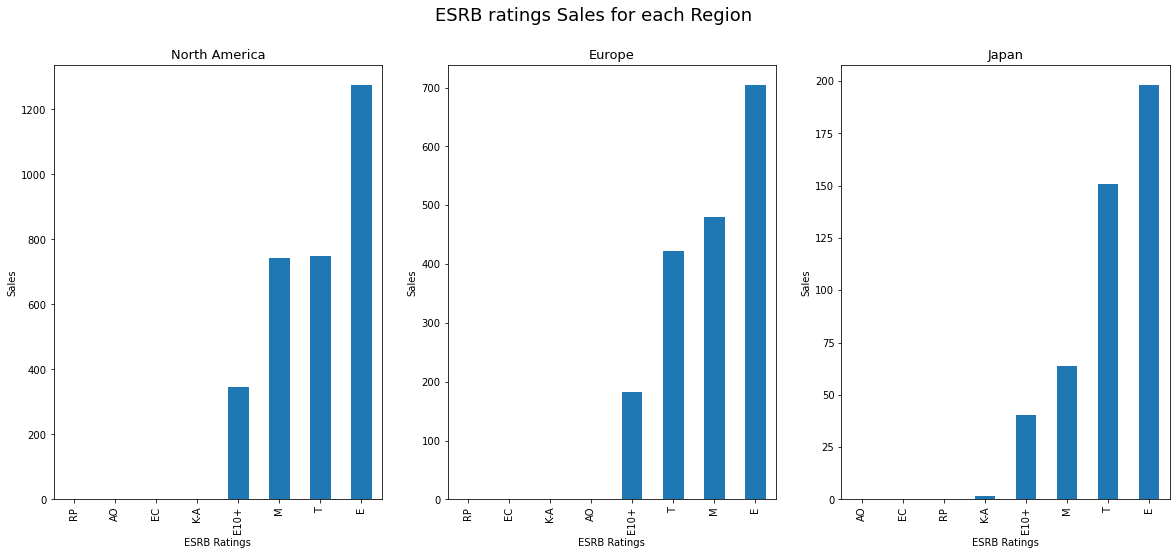

In [37]:
#set figure and axis
fig, axs = plt.subplots(1, 3, figsize=(20,8))
#title
plt.suptitle("ESRB ratings Sales for each Region", size=18)

#na
data.groupby('rating')['na_sales'].sum().sort_values().plot(kind='bar', ax=axs[0])
axs[0].set_title('North America', size=13)
axs[0].set_xlabel('ESRB Ratings')
axs[0].set_ylabel('Sales')

#eu
data.groupby('rating')['eu_sales'].sum().sort_values().plot(kind='bar', ax=axs[1])
axs[1].set_title('Europe', size=13)
axs[1].set_xlabel('ESRB Ratings')
axs[1].set_ylabel('Sales')

#jp
data.groupby('rating')['jp_sales'].sum().sort_values().plot(kind='bar', ax=axs[2])
axs[2].set_title('Japan', size=13)
axs[2].set_xlabel('ESRB Ratings')
axs[2].set_ylabel('Sales')


plt.show()

There are no significant differences in terms of distribution between the regions, the number of sales do differ but that is to be expected.

The ESRB ratings which sells the most at any region are the following(in descending order):

- 'E' - Stands for 'Everyone'
- 'M' - Stands for 'Mature, 17+'
- 'T' - Stands for 'Teen, 13+'
- 'E10+' - Stands for 'Everyone above 10'

This is how ESRB ratings affects sales in all regions, however, since the ESRB rating are not numeric values we can't actually examine the correlation between the varibles to get a more definite result.

### Conclusion

To cunclude, at first we looked at the top 5 platform in each region in terms of sales. Using bar and pie charts we found some variations in platforms market share from region to region:

- In contrast to NA(13.7% share) and  EU(11.2% share), in Japan(less than 2% share), X360 isn't one of the top 5 platforms.

- In contrast to NA(11.2% share) and  EU(10.8% share), in Japan(5.3% share), Wii isn't one of the top 5 platforms.

- In contrast to NA(9.0% share) and  EU(13.6% share), in Japan(6.2% share), PS3 isn't one of the top 5 platforms.

- In contrast to NA(8.8% share) and  JP(13.6% share), in Europe(7.9% share), DS isn't one of the top 5 platforms.

- In contrast to EU(8.9% share) and  JP(10.8% share), in North America(7.7% share), PS isn't one of the top 5 platforms.

- 3DS and SNES are top 5 platforms only in Japan.

In general, the top 5 platforms in Japan are different than the top 5 in NA/EU(which are very similar), perhaps it has something to do with the platforms companies origin(Microsoft - USA, Sony & Nintendo - Japan), maybe the culture differences affect this variations as well.

Next, we looked at top 5 genres in each regions and arrived to the following conclusions.

The top game genres in each region are(in descending order):
- NA: Action, Sports, Shooter, Platform, and Misc.
- EU: Action, Sports, Shooter, Racing, and Misc.
- NA: Role-Playing, Action, Sports, Platform, and Misc.

Notice that the NA and EU top 5 genres are almost identical except for place 4th.

As with the top 5 platforms, the variations between Japan and NA/EU top 5 genres might be due to the culture differences, North America and Europe are part of the Western Society, Japan has its own unique culture with eastern influences.

Lastly, we examined the effect of ESRB ratings on sales in individual regions.

The ESRB ratings which sells the most at any region are the following(in descending order):

- 'E' - Stands for 'Everyone'
- 'M' - Stands for 'Mature, 17+'
- 'T' - Stands for 'Teen, 13+'
- 'E10+' - Stands for 'Everyone above 10'

This is how ESRB rating affect sales, however, since the ESRB rating are not numeric values we can't actually examine the correlation between the varibles. 

## Testing Hypotheses

<a class="anchor" id="hypotheses"></a>
[Go back to the Table of Contents](#table_of_contents)

Let's start with the first hypothesis:

Average user ratings of the Xbox One and PC platforms are the same.

In this case are null hypothesis would be:

- Average user ratings of the Xbox One and PC platforms are the equals.

And the alternative hypothesis would be:

- Average user ratings of the Xbox One and PC platforms are the not equals.

Before we test the hypothesis let's examine the differences between the platforms average user ratings variance.

In [38]:
# Assign sample to dedicated variables
pc_sample = data.query('platform == "PC"').user_score.dropna()
xone_sample = data.query('platform == "XOne"').user_score.dropna()

print("The variance of PC's user ratings {}".format(np.var(pc_sample)))
print("The variance of Xbox One's user ratings {}".format(np.var(xone_sample)))

The variance of PC's user ratings 2.3461128196131775
The variance of Xbox One's user ratings 1.8965188383045533


We can see clearly that there is more than 5% differences between the variance values, that means we should use 'equal_var=False' when we test the hypothesis.

I chose to use alpha value of 5% since its considered to be the 'golden standard'.

In [39]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(pc_sample, xone_sample, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  4.5385802963771776e-06
We reject the null hypothesis


As you can see above the null hypothesis was rejected, which means that the average user ratings of the Xbox One and PC platforms are the not equals.

Next, let's test our second hypothesis:

Average user ratings for the Action and Sports genres are different.

In this case our null hypothesis would be:

- Average user ratings for the Action and Sports genres are equals.

And our alternative hypothesis would be:

- Average user ratings for the Action and Sports genres are not equals.

Before we test the hypothesis let's examine the differences between the genres average user ratings variance.

In [40]:
# Assign sample to dedicated variables
action_sample = data.query('genre == "Action"').user_score.dropna()
sports_sample = data.query('genre == "Sports"').user_score.dropna()

print("The variance of Action genre user ratings {}".format(np.var(action_sample)))
print("The variance of Sports genre user ratings {}".format(np.var(sports_sample)))

The variance of Action genre user ratings 2.026364874182167
The variance of Sports genre user ratings 2.6206293039045394


There is more than 5% difference between the variances values so we should apply 'equal_var=False' when we test the hypothesis.

In [41]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(action_sample, sports_sample, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.07370217419278534
We can't reject the null hypothesis


As you can see above we can't reject the null hypothesis, which means that the average user ratings for the Action genre might be equal to average user ratings for the Sports genre. Obviously we can't say it for sure.

### Conclusion

To conclude, at first I formulated the hypotheses.

**The first hypothesis:**
Average user ratings of the Xbox One and PC platforms are the same.
Next I stated the null and alternative hypothses:
- H0, Average user ratings of the Xbox One and PC platforms are the equals.
- H1, Average user ratings of the Xbox One and PC platforms are the not equals.

**The second hypothesis:**
Average user ratings for the Action and Sports genres are different.
Next I stated the null and alternative hypothses:
- H0, Average user ratings for the Action and Sports genres are equals.
- H1, Average user ratings for the Action and Sports genres are not equals.

For both hypotheses I decided to use alpha value of 0.05 since its the 'golden standard' for testing hypothesis.
Before I tested the hypotheses I examined the differences between the sample's variance.
In both cases the difference was bigger than 5%, therefore I used 'equal_var=False' in both t-tests.

Later I applied t-test to test both hypotheses and got the results:
- In the first hypothesis, the null hypothesis was rejected
- In the second hypothesis, the null hypothesis wasn't rejected


## General conclusion

<a class="anchor" id="conclusion"></a>
[Go back to the Table of Contents](#table_of_contents)

To conclude, at first we studied the general information of the data, and we found some issues that needed to be addressed:

1. Columns names contain capital letters, this is a bad practice and it'll be changed at the next stage.
2. The following columns have missing values:
- 'Name'
- 'Year_of_Release'
- 'Genre'
- 'Critic_Score'
- 'User_Score'
- 'Rating'
3. The follwing columns have the wrong data types:
- 'Year_of_Release' - float data type instead of integer, a year is a whole number.
- 'User_Score' - object data type instead of float, probably an error during the input of the data.


At the preprocessing stage, first thing we did was change the columns names to be lowercase letters.

Next, using the stb.missing() method we calculated the number of missing values in each column and their share of total values in the columns. With that information we determined that the missing values in 'year_of_release'/'name'/'genre' can be dropped without significantly impact our analysis (missing values share was less than 2% in each of these columns).

On the other hand, the missing values share in each of the columns 'critic_score'/'rating' was more than 40%, since there is no logical way of filling those missing values without affecting our analysis significantly, we decided to leave them blank.

In the case of 'user_score' column, we used the stb.freq() method and discovered that the value 'tbd' accounts for more than 24% of the data in the column, this was definitely something that needed to be addressed. 
This issue was handled with the to_numeric method ('tbd' was changed to NaN), the missing values in the column were left blank (same reasoning as in the 'critic_score'/'rating' columns).

Possible explanations for the missing data is that something went wrong during the input/preprocess of the data. For the scoring columns it might be that certain games didn't have enough exposure so they didn't get critics/users attention and wasn't scored at all. ESRB was founded in 1994, it might be that certain games that was released before that year didn't get rating and therefore the missing values in 'Rating'.

Earlier we identified the columns with the wrong data type and explained the reasoning for changing those columns data types. 
- 'year_of_release' data type was changed from float to int.
- 'user_score' data type was changed from object to float.

Lastly, we created the 'total_sales' column which sums up the sales from all regions.


Next, at the EDA stage, at first we took a look at the general distribution of games by their year of release, we were able to deduce the following:

1. The distribution of games by year is left skewd, meaning the median is higher than the mean.

2. The majority of games were created after 2001 and there is a peak of games created in 2008-2009.

3. Data about games created before 2002 can be considered insignificant.

Next, we examined how sales varied from platform to platform, we found out that 'PS', 'DS', 'Wii', 'PS3', 'X360', and 'PS2' are the platforms with the most amount of sales.

Moreover with further anaylsis of the most profitable platforms we determined:

1. 'PS2' and 'Wii' were popular and profitable platforms at their peak but now they have zero sales(games sales).

2. A platform lifespan length is about 10 years, meaning that usually 10 years after a platform comes out, sales goes down to 0 or almost 0.

3. In the case of Playstation brand by SONY, we can see a new 'PS' platform came out every 6 years.

With the information above in mind we decided to slice the data and get only the relevant period of time for our analysis (2002 - 2016).

Next, we determined which platforms are leading and sales, which ones are growing or shrinking. Using lineplot to show each platform's total sales over time, we were able to extract a few points of interest:

1. The leading platform is sales are the same ones we mentioned earlier except for 'PS' which the majority of this platform data was dropped previously.

2. The growing platforms are the 'PS4' and 'XOne'.

3. The shrinking platforms are: 'PC', '3DS', 'WiiU', and 'PSV'.

After arriving to this conclusions, we decided to continue our analysis for the growing platforms only, so we created new dataframe with the suitable data.

With the new dataframe, we built a box plot for the global sales of all games, broken down by platform in order to determine if there are significant differnce in sales. We came to the following conclusions:

Generaly, the PS4 platform is more profitable than the XOne.

1. There is not a lot of variability in the 'XOne' boxplot compare to the 'PS4', which means that XOne's total sales each year differ less from each other than the sales in PS4.

2. According to the graph, XOne's total sales are normally distributed, the mean and median values are very close.

3. According to the graph, PS4's total sales distribution is left skewd, meaning the median value is higher than the mean.

Later, we took a look at how user and professional reviews affect sales for both platforms in the new dataframe. 
We built scatter plots and calculate the correlation between reviews and sales using correlation matrix. 

These are the findings (for both platforms):

1. There is ever so slightly negative correlation between user scores and total sales, in fact, we can say that there is no correlation between the variables.

2. There is some correlation between critic scores and total sales, though its not strong correlation at all.

Lastly, we took a look at the general distribution of games by genre. Using bar charts we were able to deduce the following:

1. The most popular genres of games tend to be the most profitable too.

2. The least popular genres of games tend to be the least profitable too.


Later we created user profiles for each region, at first we looked at the top 5 platform in each region in terms of sales. Using bar and pie charts we found some variations in platforms market share from region to region:

In contrast to NA(13.7% share) and EU(11.2% share), in Japan(less than 2% share), X360 isn't one of the top 5 platforms.

In contrast to NA(11.2% share) and EU(10.8% share), in Japan(5.3% share), Wii isn't one of the top 5 platforms.

In contrast to NA(9.0% share) and EU(13.6% share), in Japan(6.2% share), PS3 isn't one of the top 5 platforms.

In contrast to NA(8.8% share) and JP(13.6% share), in Europe(7.9% share), DS isn't one of the top 5 platforms.

In contrast to EU(8.9% share) and JP(10.8% share), in North America(7.7% share), PS isn't one of the top 5 platforms.

3DS and SNES are top 5 platforms only in Japan.

In general, the top 5 platforms in Japan are different than the top 5 in NA/EU(which are very similar), perhaps it has something to do with the platforms companies origin(Microsoft - USA, Sony & Nintendo - Japan), maybe the culture differences affect this variations as well.

Next, we looked at top 5 genres in each regions and arrived to the following conclusions.

The top game genres in each region are(in descending order):

NA: Action, Sports, Shooter, Platform, and Misc.
EU: Action, Sports, Shooter, Racing, and Misc.
NA: Role-Playing, Action, Sports, Platform, and Misc.
Notice that the NA and EU top 5 genres are almost identical except for place 4th.

As with the top 5 platforms, the variations between Japan and NA/EU top 5 genres might be due to the culture differences, North America and Europe are part of the Western Society, Japan has its own unique culture with eastern influences.

Later, we examined the effect of ESRB ratings on sales in individual regions.

The ESRB ratings which sells the most at any region are the following(in descending order):

'E' - Stands for 'Everyone'
'M' - Stands for 'Mature, 17+'
'T' - Stands for 'Teen, 13+'
'E10+' - Stands for 'Everyone above 10'
This is how ESRB rating affect sales, however, since the ESRB rating are not numeric values we can't actually examine the correlation between the varibles.


Finally, we got to the testing hypotheses stage, where we formulated the hypotheses.

**The first hypothesis:**
Average user ratings of the Xbox One and PC platforms are the same.
Next I stated the null and alternative hypothses:
- H0, Average user ratings of the Xbox One and PC platforms are the equals.
- H1, Average user ratings of the Xbox One and PC platforms are the not equals.

**The second hypothesis:**
Average user ratings for the Action and Sports genres are different.
Next I stated the null and alternative hypothses:
- H0, Average user ratings for the Action and Sports genres are equals.
- H1, Average user ratings for the Action and Sports genres are not equals.

For both hypotheses I decided to use alpha value of 0.05 since its the 'golden standard' for testing hypothesis.
Before I tested the hypotheses I examined the differences between the sample's variance.
In both cases the difference was bigger than 5%, therefore I used 'equal_var=False' in both t-tests.

Later I applied t-test to test both hypotheses and got the results:
- In the first hypothesis, the null hypothesis was rejected
- In the second hypothesis, the null hypothesis wasn't rejected
